## OpenCV色彩空間
1. GRAY色彩空間
2. XYZ色彩空間
3. YCrCb色彩空間
4. HLS與HSV色彩空間
5. 顏色區域偵測
6. 藝術效果

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import cv2
%matplotlib inline

In [2]:
print('openCV version:', cv2.__version__)
print('python version:', sys.version)

openCV version: 4.1.2
python version: 3.5.2 (default, Sep 14 2017, 22:51:06) 
[GCC 5.4.0 20160609]


## 色彩空間類型轉換

除了常見的RGB色彩空間以外，還有非常多不同的色彩空間，每種色彩空間都有自己擅長的使用情境，當要處理不同類型的問題時，就需要做色彩空間的轉換，而色彩空間在轉換時依照公式不同，會因為計算中的四捨五入，導致色彩空間轉換不一定是精準可逆的。

在OpenCV中可以使用`cv2.cvtColor`函式來實現色彩空間轉換，經過此函式做轉換的結果陣列型態會與輸入影像相同(例如輸入8位元深度的圖片，轉換為任何色彩空間，都會以8位元深度的值儲存轉換結果)。由於matplotlib無法支援也無法指定圖片的色彩空間，僅能正確輸出RGB色彩空間及灰階圖，若將其他色彩空間的格式給予matplotlib，會產生顏色怪異的結果，以下程式範例就不將其他色彩空間以matplotlib輸出。

在範例中提到的色彩空間是以`cv2.cvtColor`中定義的通道順序來命名，例如YCrCb與YCbCr是相同的色彩空間只是順序有調整，HLS與HSL同理。

## GRAY色彩空間

GRAY色彩空間即為灰階影像，通常指單通道8位元深度的圖像，數值範圍為[0, 255]。

在OpenCV中由RGB轉換為灰階遵循以下公式:

$Gray = 0.299 \cdot R + 0.587 \cdot G + 0.114 \cdot B $

轉換為灰階的方式有很多，可以參考1.read_write_img.ipynb中的範例。

而將GRAY色彩空間轉換為RGB色彩空間，則直接將RGB值都以灰階值帶入:

$
\begin{align}
R = Gray \\
G = Gray \\
B = Gray
\end{align}
$

可以發現灰階與RGB色彩空間的轉換是不可逆的，變換回來的RGB陣列已與原先的陣列不同了。

img_gray的型態為: <class 'numpy.ndarray'>
img_gray的維度為: (512, 512)
img_gray的總元素數量為: 262144
img_gray的元素型態為: uint8


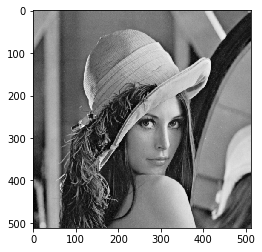

In [3]:
img_BGR = cv2.imread('data/Lenna.png')
img_RGB = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_RGB, cv2.COLOR_RGB2GRAY)
# 看看影像numpy陣列的詳細資料
print('img_gray的型態為:', type(img_gray))
print('img_gray的維度為:', img_gray.shape)
print('img_gray的總元素數量為:', img_gray.size)
print('img_gray的元素型態為:', img_gray.dtype)
plt.imshow(img_gray, cmap = 'gray')
plt.show()

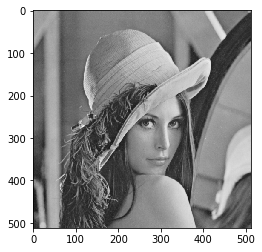

In [4]:
# 圖片由灰階轉為RGB，直接將灰階通道複製給RGB通道
img_RGB_recover = cv2.cvtColor(img_gray, cv2.COLOR_GRAY2RGB)
plt.imshow(img_RGB_recover)
plt.show()
# 可以打開以下註解查看陣列內容是否RGB通道皆為相同數值
# img_RGB_recover

## XYZ色彩空間(CIE1931)

XYZ色彩空間由國際照明委員會(International Commission on Illumination, CIE)於1931年創立，是三色刺激值色彩空間的一種。它是基於人類顏色視覺的直接測定，並充當很多其他色彩空間的定義基礎，XYZ約略對應紅色、綠色和藍色。
[XYZ wiki資源](https://zh.wikipedia.org/wiki/CIE1931%E8%89%B2%E5%BD%A9%E7%A9%BA%E9%97%B4)


在OpenCV中由RGB轉換為XYZ遵循以下公式:

$
\begin{bmatrix}X\\
Y\\
Z\end{bmatrix}
=
\begin{bmatrix}0.412453 & 0.357580 & 0.180423\\
0.212671 & 0.715160 & 0.072169\\
0.019334 & 0.119193 & 0.950227\end{bmatrix}
\cdot
\begin{bmatrix}R\\
G\\
B\end{bmatrix}
$


而將XYZ轉換為RGB遵循以下公式:

$
\begin{bmatrix}R\\
G\\
B\end{bmatrix}
=
\begin{bmatrix}3.240479 & -1.53715 & -0.498535\\
-0.969256 & 1.875991 & 0.041556\\
0.055648 & -0.204043 & 1.057311\end{bmatrix}
\cdot
\begin{bmatrix}X\\
Y\\
Z\end{bmatrix}
$

In [5]:
img_XYZ = cv2.cvtColor(img_RGB, cv2.COLOR_RGB2XYZ)
# 看看影像numpy陣列的詳細資料
print('img_XYZ的型態為:', type(img_XYZ))
print('img_XYZ的維度為:', img_XYZ.shape)
print('img_XYZ的總元素數量為:', img_XYZ.size)
print('img_XYZ的元素型態為:', img_XYZ.dtype)

img_XYZ的型態為: <class 'numpy.ndarray'>
img_XYZ的維度為: (512, 512, 3)
img_XYZ的總元素數量為: 786432
img_XYZ的元素型態為: uint8


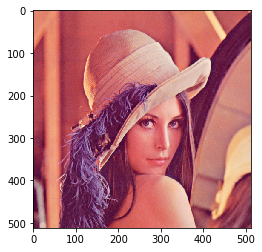

原圖與來回轉換的圖是否完全相等: False


In [6]:
# 圖片由XYZ轉為RGB
img_RGB_recover = cv2.cvtColor(img_XYZ, cv2.COLOR_XYZ2RGB)
plt.imshow(img_RGB_recover)
plt.show()

print('原圖與來回轉換的圖是否完全相等:', (img_RGB == img_RGB_recover).all())

## YCrCb色彩空間(YCC)

在傳統RGB色彩空間中，R、G、B具有相同的重要性，但卻忽略亮度的重要性，因為人眼對於亮度的敏感度要強於對顏色的敏感度，YCrCb中，Y代表的是亮度，Cr指紅色色度，Cb指藍色色度。
[YCrCb wiki資源](https://zh.wikipedia.org/wiki/YCbCr)
[YUV wiki資源](https://zh.wikipedia.org/wiki/YUV)


在OpenCV中由RGB轉換為YCrCb遵循以下公式:

$
\begin{align}
Y = &0.299 \cdot R + 0.587 \cdot G + 0.114 \cdot B \\
Cr = &(R-Y)\times 0.713 + delta \\
Cb = &(B-Y)\times 0.564 + delta
\end{align}
$

其中Y就是轉換為灰階的公式，而delta的值為:

$
delta=\begin{cases}
128,\quad 8位元圖像 \\
32768,\quad 16位元圖像 \\
0.5,\quad 單精度圖像
\end{cases}
$





而將YCrCb轉換為RGB遵循以下公式:

$
\begin{align}
R = &Y + 1.403 \cdot (Cr + delta)\\
G = &Y - 0.714 \cdot (Cr + delta) - 0.344 \cdot (Cb + delta) \\
B = &Y + 1.773 \cdot (Cb + delta)
\end{align}
$

In [7]:
img_YCrCb = cv2.cvtColor(img_RGB, cv2.COLOR_RGB2YCrCb)
# 看看影像numpy陣列的詳細資料
print('img_YCrCb的型態為:', type(img_YCrCb))
print('img_YCrCb的維度為:', img_YCrCb.shape)
print('img_YCrCb的總元素數量為:', img_YCrCb.size)
print('img_YCrCb的元素型態為:', img_YCrCb.dtype)

img_YCrCb的型態為: <class 'numpy.ndarray'>
img_YCrCb的維度為: (512, 512, 3)
img_YCrCb的總元素數量為: 786432
img_YCrCb的元素型態為: uint8


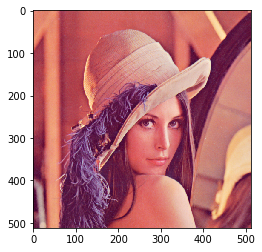

原圖與來回轉換的圖是否完全相等: False


In [8]:
# 圖片由YCrCb轉為RGB
img_RGB_recover = cv2.cvtColor(img_YCrCb, cv2.COLOR_YCrCb2RGB)
plt.imshow(img_RGB_recover)
plt.show()

print('原圖與來回轉換的圖是否完全相等:', (img_RGB == img_RGB_recover).all())

## HLS與HSV色彩空間

HLS和HSV都是一種將RGB色彩模型中的點在圓柱坐標系中的表示法。HLS即色相、亮度、飽和度(英語：Hue, Lightness, Saturation)。HSV即色相、飽和度、明度(英語：Hue, Saturation, Value)。
[HLS HSV wiki資源](https://zh.wikipedia.org/wiki/HSL%E5%92%8CHSV%E8%89%B2%E5%BD%A9%E7%A9%BA%E9%97%B4)

HLS與HSV圓柱比較。
![Imgur](https://i.imgur.com/oLa8Gpg.png)

圖a與e為為整個圓柱的立體空間圖，下方圖片為固定三個變量的其中之一，另外兩個變量所製作的圖表，由圖表我們可以知道H為0~359的值，代表色環所指的角度，S、L、V都為0~1之間的值，HLS與HSV中色相的定義是相同的，差別為亮度和飽和度的定義，在HLS中，L最高代表白色，L最低代表黑色(由圖b可以觀察)，白色屬於最飽和色，而HSV白色屬於不飽和色。

在OpenCV中由RGB轉換為HLS必須先將RGB範圍由0~255映射到0~1之間，並遵循以下公式:

$
\begin{align}
M =& max(R, G, B)\\
m =& mix(R, G, B)
\end{align}
$

$
h=\begin{cases}
0°,\quad M = m \\
60° \times \frac{G - B}{M - m} + 0°,\quad M = R \quad and \quad G \geq B \\
60° \times \frac{G - B}{M - m} + 360°,\quad M = R \quad and \quad G < B \\
60° \times \frac{R - G}{M - m} + 240°,\quad M = B\\
60° \times \frac{B - R}{M - m} + 120°,\quad M = G\\
\end{cases}
$

$
l=\frac{1}{2}(M + m)
$

$
s=\begin{cases}
0,\quad l = 0 \quad or \quad M = m \\
\frac{M - m}{M + m} = \frac{M - m}{2l},\quad 0 < l \leq \frac{1}{2} \\
\frac{M - m}{2 - (M + m)} = \frac{M - m}{2-2l},\quad l > \frac{1}{2} \\
\end{cases}
$

而RGB轉換為HSV中，H的公式相同，S及V如下:

$
s=\begin{cases}
0,\quad M = 0 \\
\frac{M - m}{M} = 1 - \frac{m}{M},\quad M \neq 0 \\
\end{cases}
$

$
v = M
$

轉換後的結果以8位元深度為例，H為0~360的值將除以二變為0~180的值以符合uint8的儲存範圍，S、L、V為0~1之間的值，也會映射為0~255的值。

In [9]:
img_HLS = cv2.cvtColor(img_RGB, cv2.COLOR_RGB2HLS)
# 看看影像numpy陣列的詳細資料
print('img_HLS的型態為:', type(img_HLS))
print('img_HLS的維度為:', img_HLS.shape)
print('img_HLS的總元素數量為:', img_HLS.size)
print('img_HLS的元素型態為:', img_HLS.dtype)

img_HLS的型態為: <class 'numpy.ndarray'>
img_HLS的維度為: (512, 512, 3)
img_HLS的總元素數量為: 786432
img_HLS的元素型態為: uint8


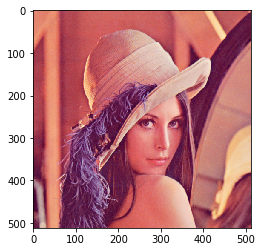

原圖與來回轉換的圖是否完全相等: False


In [10]:
# 圖片由HLS轉為RGB
img_RGB_recover = cv2.cvtColor(img_HLS, cv2.COLOR_HLS2RGB)
plt.imshow(img_RGB_recover)
plt.show()

print('原圖與來回轉換的圖是否完全相等:', (img_RGB == img_RGB_recover).all())

In [11]:
img_HSV = cv2.cvtColor(img_RGB, cv2.COLOR_RGB2HSV)
# 看看影像numpy陣列的詳細資料
print('img_HSV的型態為:', type(img_HSV))
print('img_HSV的維度為:', img_HSV.shape)
print('img_HSV的總元素數量為:', img_HSV.size)
print('img_HSV的元素型態為:', img_HSV.dtype)

img_HSV的型態為: <class 'numpy.ndarray'>
img_HSV的維度為: (512, 512, 3)
img_HSV的總元素數量為: 786432
img_HSV的元素型態為: uint8


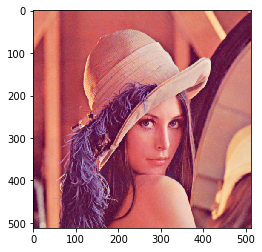

原圖與來回轉換的圖是否完全相等: False


In [12]:
# 圖片由HSV轉為RGB
img_RGB_recover = cv2.cvtColor(img_HSV, cv2.COLOR_HSV2RGB)
plt.imshow(img_RGB_recover)
plt.show()

print('原圖與來回轉換的圖是否完全相等:', (img_RGB == img_RGB_recover).all())

## 顏色區域偵測

根據上述HSV的概念，我們可以針對色相H來尋找範圍內的顏色，使用`cv2.inRange`函式可以找出所有H通道值在區間內的所有像素位置。

In [13]:
# inRange範例，mask為255的位置即代表符合範圍
img = np.random.randint(0, 256, size = [5, 5], dtype = np.uint8)
mask = cv2.inRange(img, 100, 200)
print('img')
print(img)
print('mask')
print(mask)

img
[[ 57 217 235 149 247]
 [127  89 226  68 152]
 [118 146 168  50 157]
 [146 211 165 190 104]
 [  3 146 251  54 100]]
mask
[[  0   0   0 255   0]
 [255   0   0   0 255]
 [255 255 255   0 255]
 [255   0 255 255 255]
 [  0 255   0   0 255]]


原圖


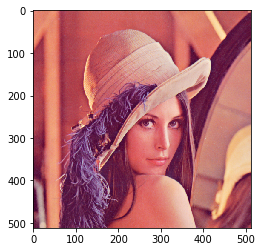

ROI


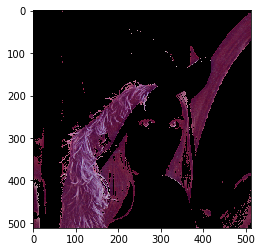

In [14]:
# 找出lenna圖中想要的顏色區間保留，其餘像素改為黑
h, s, v = cv2.split(img_HSV)
# 取得較藍的部分(70~170相當於色相環中140°到340°的位置)
mask = cv2.inRange(h, 70, 170)

img_RGB_ROI = cv2.bitwise_and(img_RGB, img_RGB, mask = mask)
print('原圖')
plt.imshow(img_RGB)
plt.show()
print('ROI')
plt.imshow(img_RGB_ROI)
plt.show()

原圖


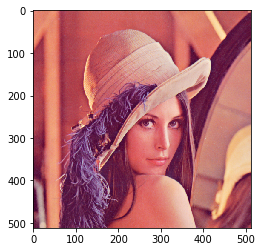

ROI


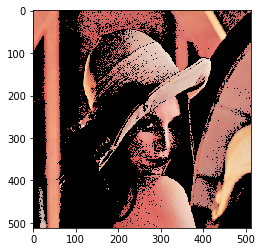

In [15]:
# 相同方式可以同時給H、S、V三種屬性限制範圍
range_min = np.array([0, 10, 30])
range_max = np.array([60, 255, 255])

mask = cv2.inRange(img_HSV, range_min, range_max)

img_RGB_ROI = cv2.bitwise_and(img_RGB, img_RGB, mask = mask)
print('原圖')
plt.imshow(img_RGB)
plt.show()
print('ROI')
plt.imshow(img_RGB_ROI)
plt.show()

## 藝術效果

我們可以藉由色彩空間的切換去改變特定色彩空間的屬性，例如一張RGB色彩空間的圖，相要改變飽和度，可以先將色彩空間轉換至HLS或HSV色彩空間，將飽和度數值適當調整後再將色彩空間轉換回RGB來顯示。

原圖


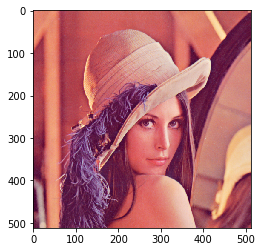

調整飽和度 * 1.5


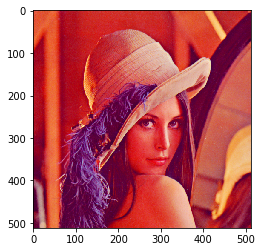

調整飽和度 * 0.5


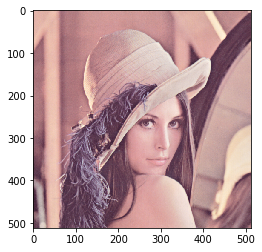

In [16]:
# 找出lenna圖中想要的顏色區間保留，其餘像素改為黑
h, s, v = cv2.split(img_HSV)
s_up = s * 1.5
s_up[s_up[:] > 255] = 255
s_up = s_up.astype(np.uint8)
img_merge_up = cv2.merge([h, s_up, v])

s_down = s * 0.5
s_down = s_down.astype(np.uint8)
img_merge_down = cv2.merge([h, s_down, v])

print('原圖')
plt.imshow(img_RGB)
plt.show()
print('調整飽和度 * 1.5')
plt.imshow(cv2.cvtColor(img_merge_up, cv2.COLOR_HSV2RGB))
plt.show()
print('調整飽和度 * 0.5')
plt.imshow(cv2.cvtColor(img_merge_down, cv2.COLOR_HSV2RGB))
plt.show()